<a href="https://colab.research.google.com/github/snghynn/ESAA-YB/blob/main/ESAA_0327_mini_project_1_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지
%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 불러오기
train=pd.read_csv("movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



### 2-1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


### 2-2) 데이터 요약


In [ ]:
print(train.shape) #600개의 데이터, 12개의 변수

(600, 12)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


### 2-3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


### 2-4) 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum() 

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()) 

0


- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True) #dir_prev_bfnum의 na에 0으로 채우기

In [ ]:
train['release_time']=pd.to_datetime(train['release_time']) #release_time을 datetime형으로 변환

# **3. 데이터 시각화 및 분석**

+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수

+ box_off_num : 관객수

> **해야하는 것**
- ㅇㅇㅇ ~> 영화 관객수 예측을 위한 시각화
- '데이터를 군집화 -> 새로운 범주'를 통해 시각화하는 것도 좋은 방법이겠다

## 3-1) 영화 장르별 총 관객 점유율

- piechart로 나타내면 점유율을 한 눈에 파악하기 쉽겠다
- 사용되는 데이터: genre, box_off_num/ genere별로 top4 & bottom4
- 데이터 파악: 장르는 categorical, 관객수는 numeric

In [ ]:
# 장르별 총 관객 수 구하기
train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64

<Axes: ylabel='box_off_num'>

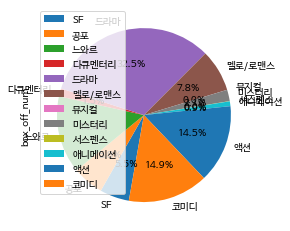

In [ ]:
train.groupby(['genre']).sum().plot(kind='pie', y='box_off_num', autopct='%.1f%%', startangle=260, counterclock=False)
#countercolck=False: 부채꼴 안에 퍼센티지 숫자 표시

> 너무 복잡해서 오히려 분포가 한 눈에 안 들어온다. -> 관객수 Top4와 Bottom4의 pie chart를 각각 시각화하고, 그 비율을 살펴보자.

In [ ]:
#Top4 장르
top4=train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)[:4]
top4

genre
드라마    138277444
코미디     63277442
액션      61711274
느와르     61119768
Name: box_off_num, dtype: int64

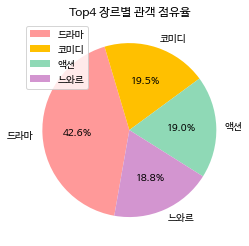

In [ ]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'] #그래프 색상 지정
top4.plot(kind='pie', y='box_off_num', ylabel='', colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Top4 장르별 관객 점유율')
plt.legend()

> 결과
- Top4의 경우, 드라마가 가장 많은 비율을 차지했고 코미디, 액션, 느와르가 비슷한 비율로 그 뒤를 따른다.

In [ ]:
#Bottom4 장르
bottom4=train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)[-4:]
bottom4

genre
다큐멘터리    6247020
애니메이션    3820460
서스펜스      165222
뮤지컬        33135
Name: box_off_num, dtype: int64

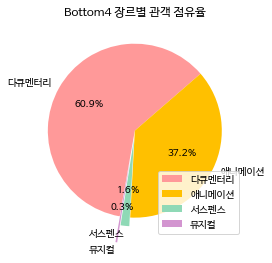

In [ ]:
bottom4.plot(kind='pie', y='box_off_num', ylabel='', colors=colors, autopct='%.1f%%', startangle=260, counterclock=False, explode=[0,0,0.1,0.3])
plt.title('Bottom4 장르별 관객 점유율')
plt.legend()

> 결과
- 하위 4개 장르 중에서도 서스펜스와 뮤지컬은 아주 작은 비율을 차지한다. 

## 3-2) 상영등급 별 관객수 분포 및 누적 관객수

- 가설: 12세 관람가 누적 관객수가 가장 많을 것이다. 
- 사용되는 데이터: screening_rat, box_off_num
- 데이터 파악: 상영등급은 categorical, 관객수는 numeric
  
1. boxplot: 관객 수 분포
2. barplot: 누적 관객수 시각화

In [ ]:
#상영등급이 어떻게 분류되어 있을까?
train['screening_rat'].value_counts() #총 4개의 범주로 이루어짐

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

Text(0, 0.5, '영화 수')

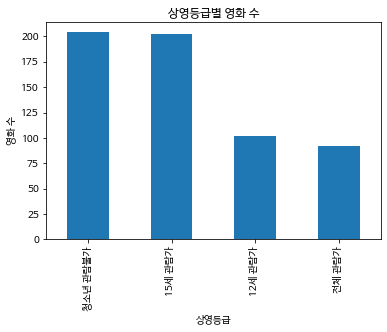

In [ ]:
# 0. 상영등급별 관객수를 파악하기 전에, 상영등급별 영화 수를 살펴보자
train['screening_rat'].value_counts().plot(kind='bar')
plt.title('상영등급별 영화 수')
plt.xlabel('상영등급')
plt.ylabel('영화 수')

> 결과
- 청소년관람불가와 15세가 가장 많고, 12세 관람가, 전체관람가가 그 뒤를 따른다.

(0.0, 5000000.0)

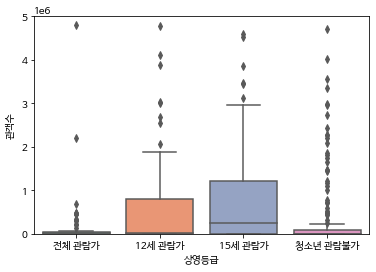

In [ ]:
# 1. box plot 활용해 상영등급 별 관객수 분포를 알아보자
plt.subplots()
labels=['전체 관람가', '12세 관람가', '15세 관람가', '청소년 관람불가']
sns.boxplot(x='screening_rat', y='box_off_num', data=train, order=labels, palette='Set2')
plt.xlabel('상영등급')
plt.ylabel('관객수')
plt.ylim(0,5000000)

> 결과
- 15세 관람가의 평균 관객수가 가장 많아보인다.
- 청소년 관람불가 영화 중 Q3~Q4에 해당하는 영화의 분포가 다양하다.
- 청소년 관람불가 상영 영화수가 많지만, 평균 관객수는 많지 않아보인다. 

In [ ]:
# 2. 상영등급별 누적관객수를 bar graph 통해 시각화하자
total_rat=train.groupby('screening_rat')['box_off_num'].sum().sort_values(ascending=False)
total_rat

screening_rat
15세 관람가     251998766
12세 관람가      86188052
청소년 관람불가     74292991
전체 관람가       12429242
Name: box_off_num, dtype: int64

Text(0, 0.5, '누적 관객수')

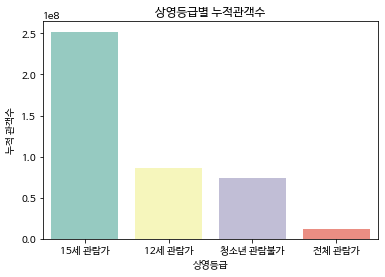

In [ ]:
#상영등급별 누적관객수 bar graph 그리기
df=pd.DataFrame(total_rat)
df['screening_rat']= df.index
plt.subplots()
sns.barplot(x='screening_rat', y='box_off_num', data=df, palette='Set3')

plt.title('상영등급별 누적관객수')
plt.xlabel('상영등급')
plt.ylabel('누적 관객수')

> 결과
- 15세관람가>12세관람가>청소년관람불가>전체관람가 순으로 누적 관객수가 가장 많았다.
- 특히 15세 관람가는 다른 상영등급에 비해 2배 이상이다.
- 예상과는 다르게 15세 관람가 누적관객수가 가장 많다. 



## 3-3) 분기별 많이 개봉하는 장르
- 가설: 1,4분기에는 멜로/로맨스&드라마, 2~3 분기에는 공포 영화가 많이 개봉될 것이다
- 사용되는 데이터: release_month를 이용하여 만든 quart, genre
- 데이터 파악: release_month는 numeric, quart와 genre는 categorical

- 계획: 3개월 단위로 분기를 나누어 quart에 집어넣는다. 이후 누적 막대 그래프를 그려 분기별 많이 개봉되는 장르를 알아본다.

In [ ]:
#1년을 4분기로 나누어 'quart'라는 column에 집어넣기
train['quart']=''
for i in range(len(train)):
  if train['release_month'][i]>=1 and train['release_month'][i]<=3: 
    train['quart'][i]='1분기'
  elif train['release_month'][i]>=4 and train['release_month'][i]<=6:
    train['quart'][i]='2분기'
  elif train['release_month'][i]>=7 and train['release_month'][i]<=9 : 
    train['quart'][i]='3분기'
  else:
    train['quart'][i]='4분기'

In [ ]:
train.head(5) #분기에 맞게 잘 분류되었다.

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir,release_year,release_month,release_day,release_weekday,quart
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,I,2012,11,22,3,4분기
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,IV,2015,11,19,3,4분기
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,III,2013,6,5,2,2분기
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,II,2012,7,12,3,3분기
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,II,2010,11,4,3,4분기


Text(0, 0.5, '장르별 개봉하는 영화 수')

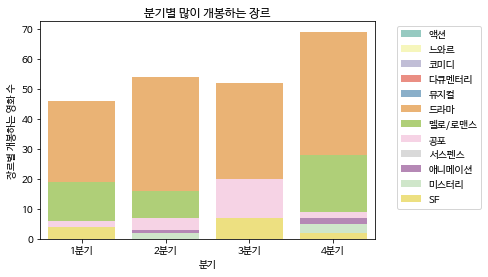

In [ ]:
labels=['1분기', '2분기', '3분기', '4분기']
sns.countplot(x='quart', hue='genre', palette='Set3', data=train, dodge=False, order=labels)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('분기별 많이 개봉하는 장르')
plt.xlabel('분기')
plt.ylabel('장르별 개봉하는 영화 수')

> 결과
- 드라마는 모든 분기에 많이 개봉된다.
- 예측대로 1분기, 4분기에는 멜로/로맨스 영화가 많이 개봉된다.
- 예측대로 2분기, 3분기에는 공포 영화가 많이 개봉된다.
- SF영화는 3분기에 많이 제작되는 것을 알 수 있다.

## 3-4) 감독의 이전작품 관객수와 영화의 관객수

- 가설: dir_prev_bfnum이 높을수록 관객수가 많을 것이다
- 사용되는 데이터: dir_prev_bfnum (해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수), box_off_num
- 데이터 파악: 둘 다 numeric

- 계획: dir_prev_bfnum을 I군, II군, III군, IV군으로 나눈 후 bar graph로 감독유명도에 따른 평균 관객수 나타내기


In [ ]:
train['dir_prev_bfnum'].describe() #50% 이상의 감독의 이전관객수가 0으로 나타난다

count        600.0
mean      472699.3
std      1309474.3
min            0.0
25%            0.0
50%            0.0
75%       376141.6
max     17615314.0
Name: dir_prev_bfnum, dtype: float64

In [ ]:
# dir_prev_bfnum에 따라서 I~IV군으로 나누어 'dir'라는 새로운 col에 저장
train['dir']=''
for i in range(len(train)):
  if train['dir_prev_bfnum'][i]==0: 
    train['dir'][i]='I'
  elif train['dir_prev_bfnum'][i]<100000:
    train['dir'][i]='II'
  elif train['dir_prev_bfnum'][i]<1000000: 
    train['dir'][i]='III'
  else:
    train['dir'][i]='IV'

In [ ]:
train['dir'].value_counts() #이전 작품 관객수가 0인 I군을 제외하면 균등하게 분류되었다

I      330
II      95
IV      90
III     85
Name: dir, dtype: int64

Text(0, 0.5, '평균 관객 수')

<Figure size 432x288 with 0 Axes>

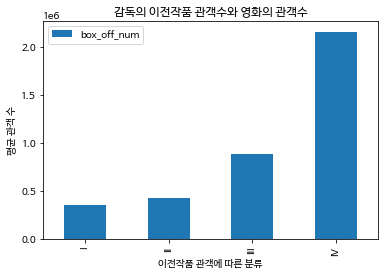

In [ ]:
plt.figure()
train[['box_off_num']].groupby(train['dir']).mean().plot(kind='bar')

plt.title('감독의 이전작품 관객수와 영화의 관객수')
plt.xlabel('이전작품 관객에 따른 분류')
plt.ylabel('평균 관객 수')

> 결과
- 예상대로 이전 작품 평균 관객수가 가장 많은 IV군의 평균 관객수가 가장 많았다.
- IV군의 평균 관객수가 나머지 군의 평균 관객수의 2배가 넘는다.

## 3-5) 스텝 수와 관객 수 관계 회귀 그래프 나타내기

- 가설: 스텝수가 많을수록 관객수가 많을 것이다.
- 사용되는 데이터: num_staff, box_off_num
- 데이터 파악: 둘 다 numeric
- 계획: 스텝 수에 따른 관객 수를 jointplot으로 나타내보자.


Text(0, 0.5, '관객 수')

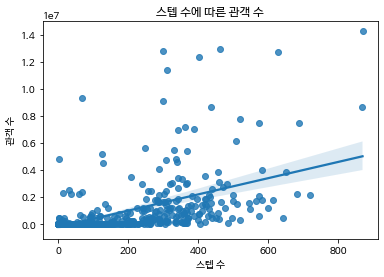

In [ ]:
#회귀 그래프와 함께 나타내기(1)_두잇판다스 pg.99
ax = plt.subplots( )
ax = sns.regplot(x='num_staff', y='box_off_num', data=train) 
ax.set_title('스텝 수에 따른 관객 수') 
ax.set_xlabel('스텝 수')
ax.set_ylabel('관객 수') 

In [ ]:
#회귀 그래프와 함께 나타내기(2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Y=train.box_off_num.values
X=train.num_staff.values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

lr.fit(X, Y)

LinearRegression()

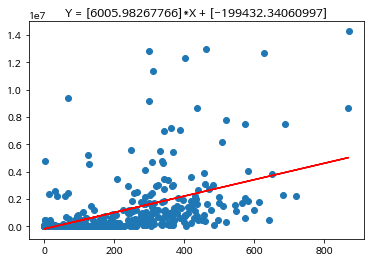

In [ ]:
plt.scatter(X, Y)
Y2 = lr.coef_[0]*X +lr.intercept_
plt.plot(X, Y2, color='red')
plt.title('Y = {}*X + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

> 결과
- 어느 정도의 관계는 있어보이지만, 데이터의 전처리가 필요해보인다.